In [294]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [295]:
#Load the dataset
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

train_orig=train
test_orig=test

test['CoapplicantIncome']=test['CoapplicantIncome'].astype(float)
print(test['CoapplicantIncome'].dtypes)
print(train.dtypes)
print(test.dtypes)

float64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [296]:
#Analysis
print("Table")
print("-----")
print(train.head(2))
print()
print("Columns")
print("-------")
print(train.columns)
print()
print("Details")
print("-------")
print(train.describe())
print()
print("Datatypes")
print("---------")
print(train.dtypes)

Table
-----
    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  

Columns
-------
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Details
-------
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5

Univariate Analysis
---------- --------


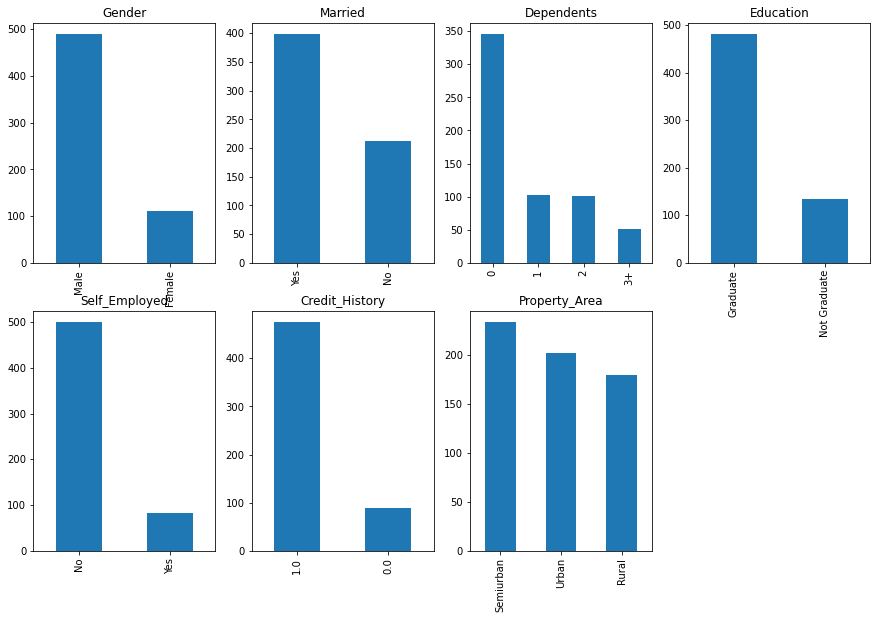

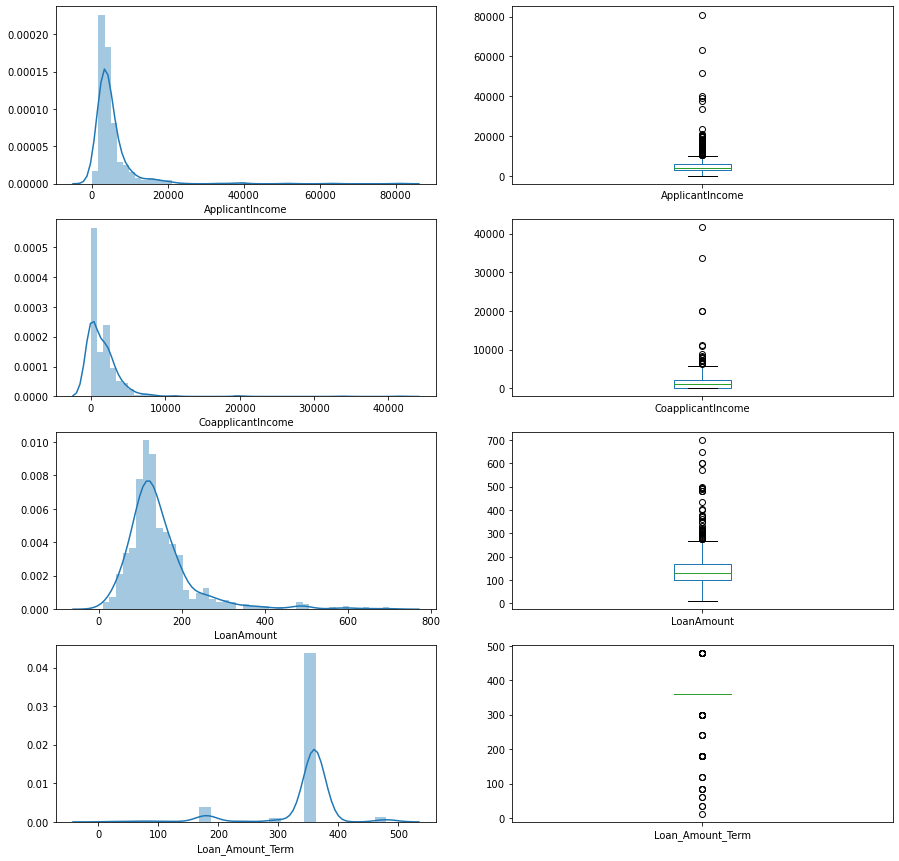

In [297]:
#Univariate Analysis
plt.figure(1)

print("Univariate Analysis")
print("---------- --------")

plt.subplot(341)
train['Gender'].value_counts().plot.bar(figsize=(15,15),title='Gender')

plt.subplot(342)
train['Married'].value_counts().plot.bar(figsize=(15,15),title='Married')

plt.subplot(343)
train['Dependents'].value_counts().plot.bar(figsize=(15,15),title='Dependents')

plt.subplot(344)
train['Education'].value_counts().plot.bar(figsize=(15,15),title='Education')

plt.subplot(345)
train['Self_Employed'].value_counts().plot.bar(figsize=(15,15),title='Self_Employed')

plt.subplot(346)
train['Credit_History'].value_counts().plot.bar(figsize=(15,15),title='Credit_History')

plt.subplot(347)
train['Property_Area'].value_counts().plot.bar(figsize=(15,15),title='Property_Area')

#######################################################################################
plt.figure(2)

plt.subplot(421)
sns.distplot(train['ApplicantIncome'])
plt.subplot(422)
train['ApplicantIncome'].plot.box(figsize=(15,15))

plt.subplot(423)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(424)
train['CoapplicantIncome'].plot.box(figsize=(15,15))

plt.subplot(425)
sns.distplot(train['LoanAmount'])
plt.subplot(426)
train['LoanAmount'].plot.box(figsize=(15,15))

plt.subplot(427)
sns.distplot(train['Loan_Amount_Term'])
plt.subplot(428)
train['Loan_Amount_Term'].plot.box(figsize=(15,15))

Bivariate Analysis
--------- --------


<Figure size 432x288 with 0 Axes>

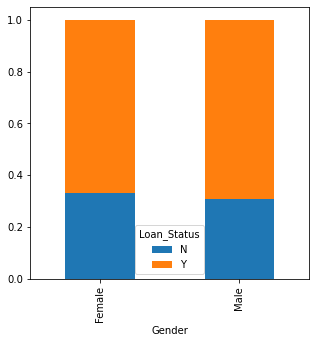

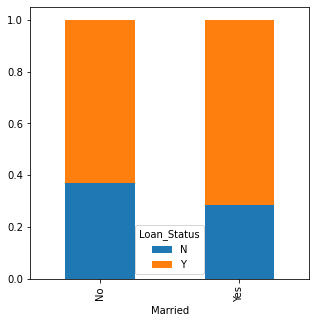

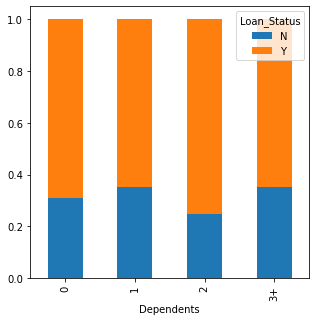

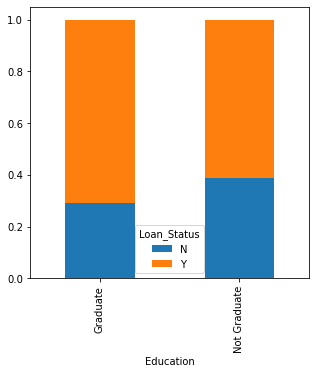

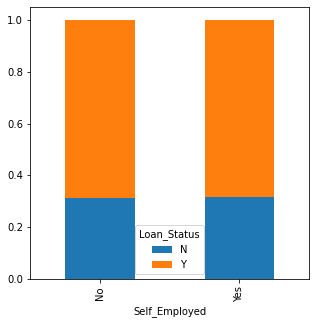

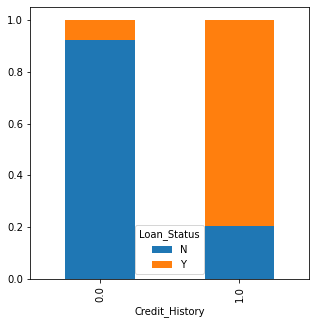

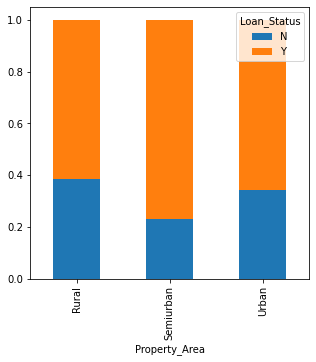

In [271]:
#Bivariate Analysis
print("Bivariate Analysis")
print("--------- --------")
plt.figure(1)

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))


Text(0, 0.5, 'Percentage')

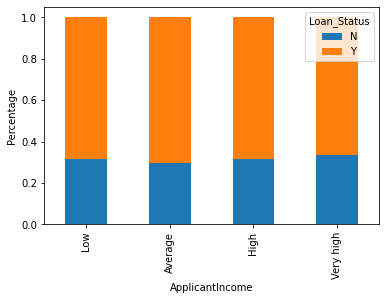

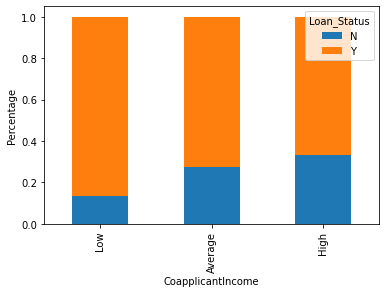

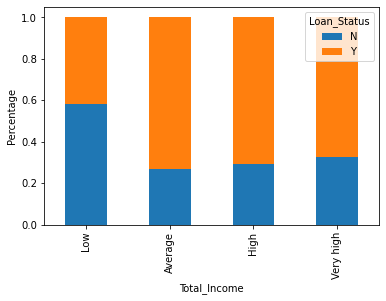

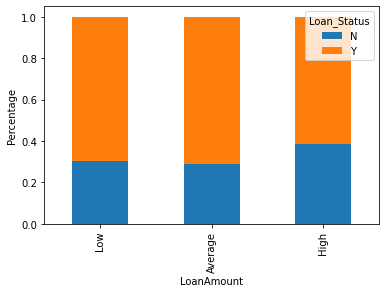

In [298]:
#BiVariate Analysis for Numerical Variables
#------------------------------------------
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [299]:
#Missing Values & Outlier Treatment
#----------------------------------
train=train.drop(['Income_bin','Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin'],axis=1)
train=train.drop(['Total_Income'],axis=1)

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

train.columns
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

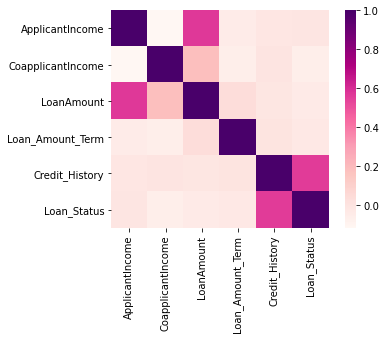

In [300]:
#Heatmap
#-------
matrix = train.corr() 
plt.subplots() 
sns.heatmap(matrix, square=True, cmap="RdPu");

In [301]:
#Outlier Treatment in Train dataset
#----------------------------------
train.isnull().sum()
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Education'].fillna(train['Education'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Property_Area'].fillna(train['Property_Area'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [302]:
#Outlier Treatment in Test dataset
#---------------------------------
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Education'].fillna(test['Education'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Property_Area'].fillna(test['Property_Area'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

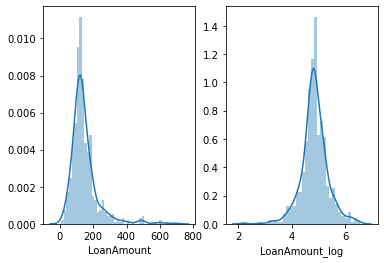

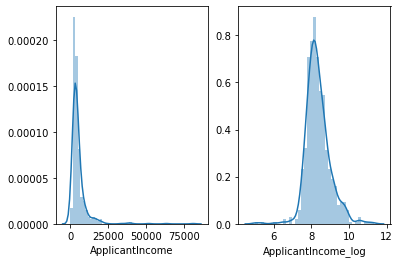

In [277]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])
sns.distplot(train['LoanAmount_log'])
plt.show()

plt.figure(1)

plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome_log']=np.log(train['ApplicantIncome'])
test['ApplicantIncome_log']=np.log(test['ApplicantIncome'])
sns.distplot(train['ApplicantIncome_log'])
plt.show()


In [303]:
#Remove Loan_ID
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [304]:
train.columns
train.dtypes
X = train.drop('Loan_Status',1) 
y = train.Loan_Status
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [305]:
print(X.columns)
print(X.dtypes)
y[0]

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No        

1

In [306]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1 

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.8032786885245902


In [308]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [309]:
#Prediction
pred_cv=model.predict(x_cv)
print(accuracy_score(y_cv,pred_cv))

0.8108108108108109


In [311]:
pred_test=model.predict(test)
print(pred_test)
print(x_cv.columns)
print(test.columns)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education

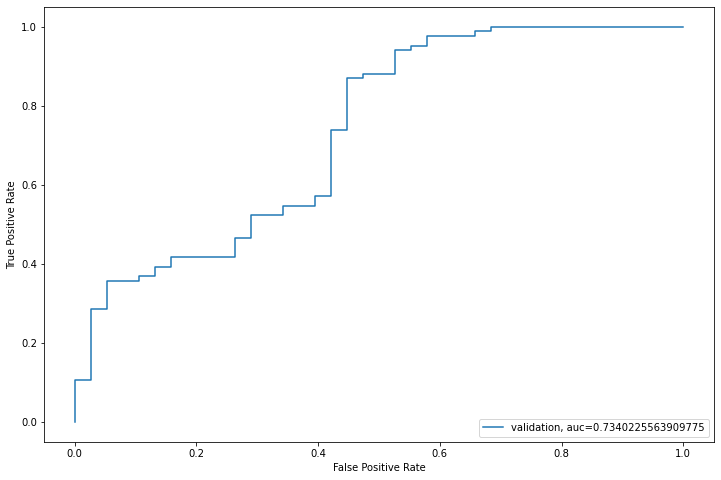

In [312]:
test.columns
#print(x_cv.dtypes)
#print(test.dtypes)
test.isna().sum()
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()